<a href="https://colab.research.google.com/github/ranj10/bank_deposit_analysis/blob/main/bank_deposit_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Deposit Analysis

In [ ]:
pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=6351f5d5a373824fb6d25d02196499cf4a7b537faf984295b2d02e17d65611d2
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest


In [ ]:
from pyforest import *

In [ ]:
# To load the data (.csv file)
data = pd.read_excel("/content/bank-term-deposit.xlsx")

<IPython.core.display.Javascript object>

In [ ]:
data.head()

,Age,Job,Marital,Education,Default,housing,Loan,Contact,Month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.tail()

,Age,Job,Marital,Education,Default,housing,Loan,Contact,Month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
data.shape

(41188, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           41188 non-null  int64  
 1   Job           41188 non-null  object 
 2   Marital       41188 non-null  object 
 3   Education     41188 non-null  object 
 4   Default       41188 non-null  object 
 5   housing       41188 non-null  object 
 6   Loan          41188 non-null  object 
 7   Contact       41188 non-null  object 
 8   Month         41188 non-null  object 
 9   day_of_week   41188 non-null  object 
 10  duration      41188 non-null  int64  
 11  campaign      41188 non-null  int64  
 12  pdays         41188 non-null  int64  
 13  previous      41188 non-null  int64  
 14  poutcome      41188 non-null  object 
 15  empvarrate    41188 non-null  float64
 16  conspriceidx  41188 non-null  float64
 17  consconfidx   41188 non-null  float64
 18  euribor3m     41188 non-nu

In [ ]:
data.describe(include="all")

,Age,Job,Marital,Education,Default,housing,Loan,Contact,Month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [ ]:
data.isnull().sum()

Age             0
Job             0
Marital         0
Education       0
Default         0
housing         0
Loan            0
Contact         0
Month           0
day_of_week     0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
empvarrate      0
conspriceidx    0
consconfidx     0
euribor3m       0
nremployed      0
y               0
dtype: int64

In [ ]:
data.columns

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'housing', 'Loan',
       'Contact', 'Month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'empvarrate', 'conspriceidx', 'consconfidx',
       'euribor3m', 'nremployed', 'y'],
      dtype='object')

In [ ]:
data.nunique()

Age               78
Job               12
Marital            4
Education          8
Default            3
housing            3
Loan               3
Contact            2
Month             10
day_of_week        5
duration        1544
campaign          42
pdays             27
previous           8
poutcome           3
empvarrate        10
conspriceidx      26
consconfidx       26
euribor3m        316
nremployed        11
y                  2
dtype: int64

In [ ]:
data.corr(method="spearman")

<ipython-input-33-f1be2e5a8198>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method="spearman")


,Age,duration,campaign,pdays,previous,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed
Age,1.000000,-0.002123,0.005715,-0.001062,-0.012643,0.045003,0.044790,0.114536,0.054391,0.044789
duration,-0.002123,1.000000,-0.080953,-0.083072,0.042407,-0.069201,0.002854,-0.008678,-0.078346,-0.095225
campaign,0.005715,-0.080953,1.000000,0.055514,-0.087420,0.156360,0.096494,-0.001554,0.140512,0.144264
pdays,-0.001062,-0.083072,0.055514,1.000000,-0.509583,0.227698,0.056763,-0.077265,0.278488,0.290673
previous,-0.012643,0.042407,-0.087420,-0.509583,1.000000,-0.435293,-0.282720,-0.115967,-0.454724,-0.438721
empvarrate,0.045003,-0.069201,0.156360,0.227698,-0.435293,1.000000,0.664890,0.224693,0.939915,0.944702
conspriceidx,0.044790,0.002854,0.096494,0.056763,-0.282720,0.664890,1.000000,0.245633,0.490970,0.464738
consconfidx,0.114536,-0.008678,-0.001554,-0.077265,-0.115967,0.224693,0.245633,1.000000,0.236646,0.132707
euribor3m,0.054391,-0.078346,0.140512,0.278488,-0.454724,0.939915,0.490970,0.236646,1.000000,0.928857
nremployed,0.044789,-0.095225,0.144264,0.290673,-0.438721,0.944702,0.464738,0.132707,0.928857,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Job', ylabel='count'>

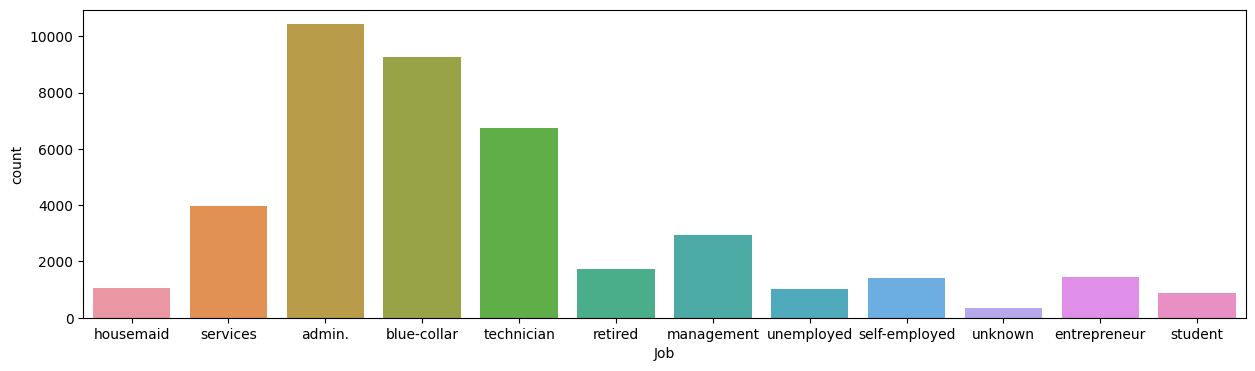

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(x="Job",data=data)

In [ ]:
a=data.groupby(['Month','y'],as_index=False)['Age'].count().rename(columns={'Age':'Count'})
a['percent']=round(a['Count']*100/a.groupby('Month')['Count'].transform('sum'),1)
a['percent']=a['percent'].apply(lambda x: '{}%'.format(x))
fig=px.bar(a,x='Month',y='Count',text='percent',color='y',barmode='group',color_discrete_sequence=['brown','tomato'])
fig.update_layout(title_x=0.5,showlegend=True,legend_title_text="Deposit",title_text='<b style="color:black; font-size:100%;">Deposits(y) based on last Contact month')
fig.update_traces(marker=dict(line=dict(color='#00FFFF', width=1)),textposition = "outside")
fig.show()


<IPython.core.display.Javascript object>

In [ ]:
fig=px.line(data.groupby(['campaign','y'],as_index=False)['Age'].count().rename(columns={'Age':'Count'}),x='campaign',y='Count',color='y',color_discrete_sequence=['red','dimgray'])
fig.update_layout(title_x=0.5,legend_title_text="<b>Term Deposit",title_text='<b style="font-family: Times New Roman; font-size:1.3vw">Effect of Campaign on Term Deposits<b><br><b style="font-family: Times New Roman; font-size:1vw">number of contacts performed during the campaign and for this client </b>')
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Job', ylabel='count'>

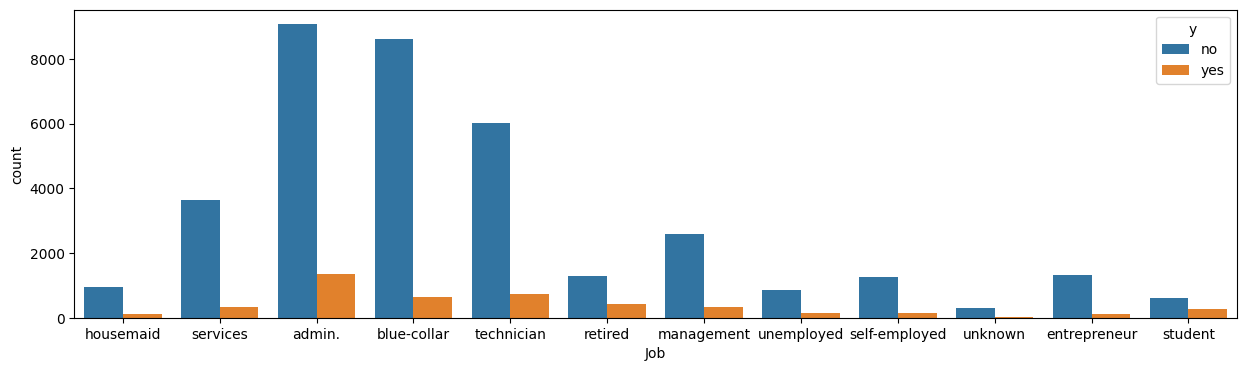

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(x="Job",data=data, hue="y")
#def countplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, ax=None, **kwargs)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

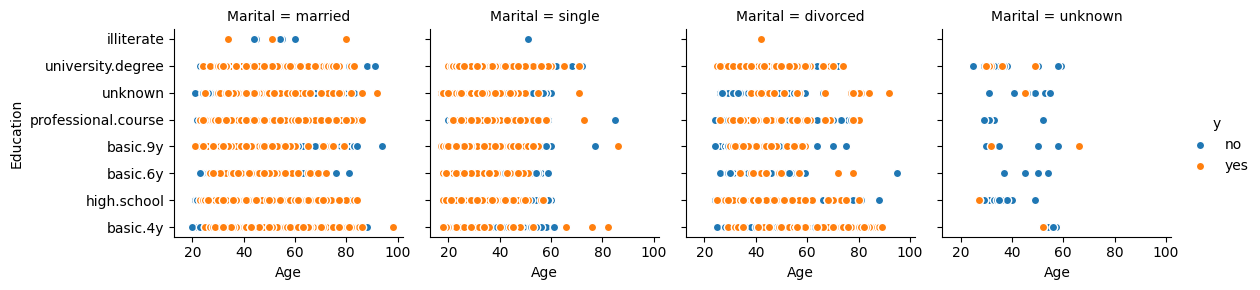

In [ ]:

#Form a facetgrid using columns with a hue
graph = sns.FacetGrid(data, col ="Marital",  hue ="y")
# map the above form facetgrid with some attributes
graph.map(plt.scatter,"Age","Education", edgecolor ="w").add_legend()
# show the object
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Education', ylabel='count'>

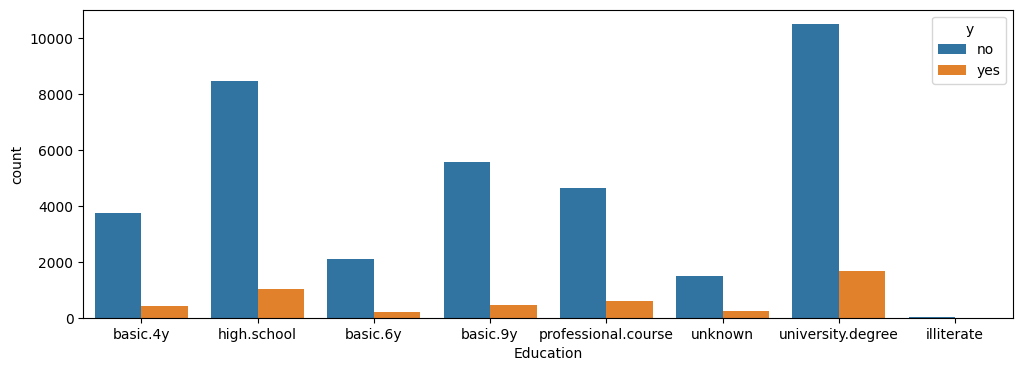

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x="Education",data=data, hue="y")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='housing', ylabel='count'>

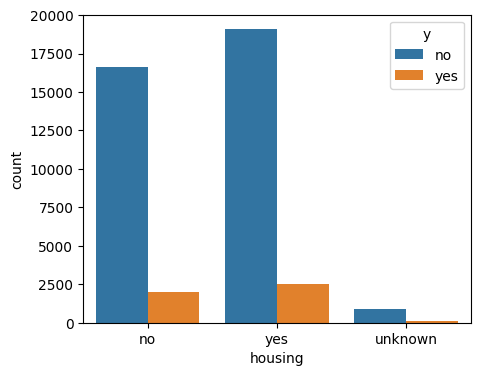

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x="housing",data=data, hue="y")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Loan', ylabel='count'>

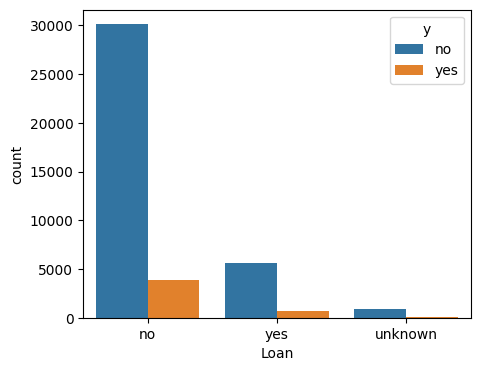

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x="Loan",data=data, hue="y")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Default', ylabel='count'>

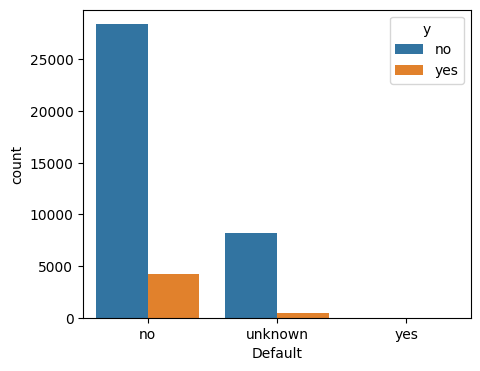

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x="Default",data=data, hue="y")

In [ ]:
#label encoding for categorical features
from sklearn.preprocessing import LabelEncoder
for i in ["Job","Marital", "Education", "Default", "day_of_week","Month","poutcome","Contact","housing","Loan","y"]:
  data[i]= LabelEncoder().fit_transform(data[i])


data.head()

,Age,Job,Marital,Education,Default,housing,Loan,Contact,Month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
corr=data.corr(method="spearman")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

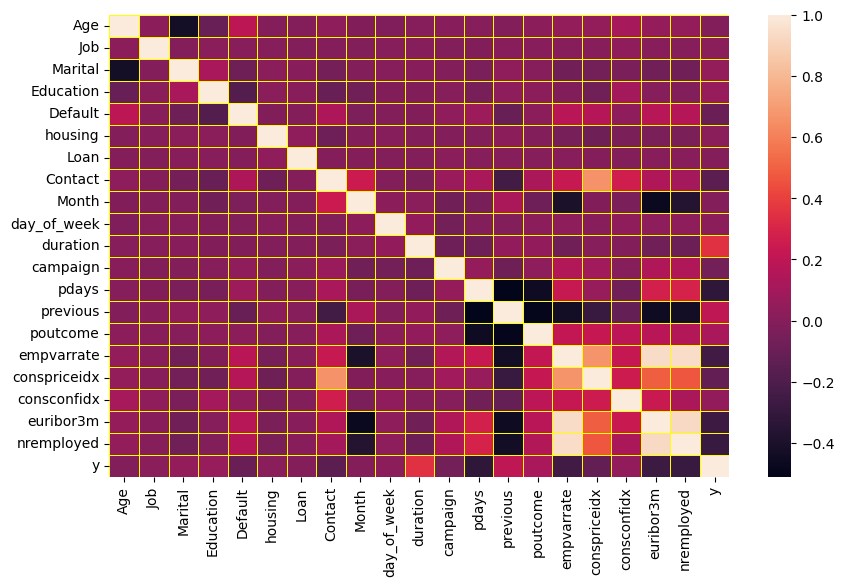

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,linewidths=.5,
                linecolor="yellow")

In [ ]:
# Examine multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]

print(vif_data)

<IPython.core.display.Javascript object>

         feature           VIF
0            Age     19.748825
1            Job      2.120196
2        Marital      5.655898
3      Education      4.466418
4        Default      1.405036
5        housing      2.205621
6           Loan      1.207807
7        Contact      2.867721
8          Month      6.844007
9    day_of_week      3.086377
10      duration      2.451693
11      campaign      1.930696
12         pdays    166.369670
13      previous      5.964609
14      poutcome     34.178782
15    empvarrate     40.727910
16  conspriceidx  38881.736440
17   consconfidx    131.859364
18     euribor3m    333.532385
19    nremployed  44301.582935
20             y      1.714507


In [ ]:
#train test split
#feature above vif=5 are dropped
X=data.drop(["Age","pdays","poutcome","empvarrate","conspriceidx","consconfidx","euribor3m","nremployed","y"] ,axis=1)
y=data["y"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

<IPython.core.display.Javascript object>

(28831, 12)
(12357, 12)
(28831,)
(12357,)


In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train





array([[-1.03362777, -0.28835206,  1.05155724, ..., -0.69511644,
         0.15413935,  1.67379958],
       [ 1.47115571,  1.3510639 ,  1.05155724, ..., -0.94491621,
         0.51747772, -0.34914386],
       [-0.7553185 , -0.28835206, -1.28865478, ...,  0.07349826,
        -0.20919902, -0.34914386],
       ...,
       [-1.03362777, -0.28835206, -0.35256997, ..., -0.24547684,
        -0.57253738,  1.67379958],
       [ 0.07960933, -0.28835206,  1.05155724, ...,  0.14267359,
        -0.20919902, -0.34914386],
       [-1.03362777,  1.3510639 ,  1.05155724, ...,  0.28871038,
        -0.20919902, -0.34914386]])

In [ ]:
X_test=sc.transform(X_test)
X_test

array([[ 1.47115571, -0.28835206, -0.35256997, ...,  0.43474717,
        -0.57253738,  1.67379958],
       [ 2.02777426, -0.28835206,  1.51959964, ...,  0.10424285,
        -0.20919902, -0.34914386],
       [-0.7553185 , -0.28835206, -0.82061238, ..., -0.79119327,
        -0.57253738,  1.67379958],
       ...,
       [-0.7553185 ,  1.3510639 , -0.35256997, ..., -0.02642165,
        -0.20919902, -0.34914386],
       [ 1.47115571, -1.92776803,  0.58351483, ..., -0.79887942,
         0.15413935, -0.34914386],
       [ 1.47115571, -0.28835206,  1.05155724, ..., -0.14171385,
        -0.20919902,  1.67379958]])

In [ ]:
# Examine multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)





<IPython.core.display.Javascript object>

        feature       VIF
0           Job  2.034305
1       Marital  3.985834
2     Education  3.632271
3       Default  1.273387
4       housing  2.057358
5          Loan  1.196315
6       Contact  1.860439
7         Month  4.044558
8   day_of_week  2.725738
9      duration  1.880603
10     campaign  1.768809
11     previous  1.217547


In [ ]:
data["y"].value_counts()

0    36548
1     4640
Name: y, dtype: int64

<IPython.core.display.Javascript object>

Feature: 0, Score: 0.08109
Feature: 1, Score: 0.03532
Feature: 2, Score: 0.06499
Feature: 3, Score: 0.01221
Feature: 4, Score: 0.02901
Feature: 5, Score: 0.02030
Feature: 6, Score: 0.01977
Feature: 7, Score: 0.13756
Feature: 8, Score: 0.07224
Feature: 9, Score: 0.40542
Feature: 10, Score: 0.06172
Feature: 11, Score: 0.06037


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

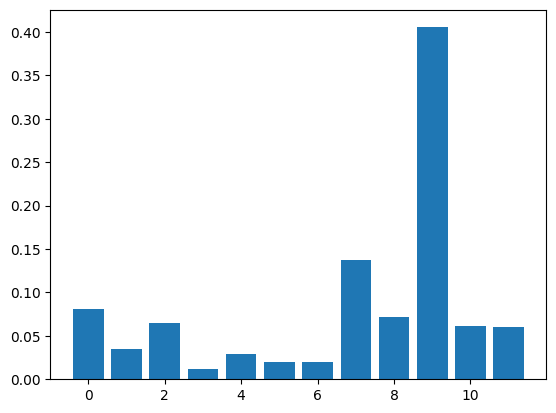

In [ ]:
#Feature selection

#selectkmethod does not work here since we have negative values.
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=10)
rfe = rfe.fit(X, y)
print(X.columns)
print(rfe.support_)
rfe.ranking_

Index(['Job', 'Marital', 'Education', 'Default', 'housing', 'Loan', 'Contact',
       'Month', 'day_of_week', 'duration', 'campaign', 'previous'],
      dtype='object')
[ True  True  True False  True  True False  True  True  True  True  True]


array([1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1])

In [ ]:
#Import different libraries for model building
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost
import math
from sklearn import metrics
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

In [ ]:
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Support Vector Machine": svm.SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Train Model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Performance of Test set
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted')
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

  # Performance of Training set
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted')

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.2f}".format(model_train_accuracy))
    print('- F1 score: {:2f}'.format(model_train_f1))
    print('- Precision: {:2f}'.format(model_train_precision))
    print('- Recall: {:2f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.2f}'.format(model_test_accuracy) )
    print('- Fl score: {:.2f}'.format(model_test_f1))
    print('- Precision: {:.2f}'.format(model_test_precision))
    print('- Recall: {:.2f}'.format(model_test_recall))


    print('='*30)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.90
- F1 score: 0.875390
- Precision: 0.875215
- Recall: 0.896327
----------------------------------
Model performance for Test set
- Accuracy: 0.90
- Fl score: 0.88
- Precision: 0.88
- Recall: 0.90


Decision Tree
Model performance for Training set
- Accuracy: 1.00
- F1 score: 1.000000
- Precision: 1.000000
- Recall: 1.000000
----------------------------------
Model performance for Test set
- Accuracy: 0.87
- Fl score: 0.87
- Precision: 0.87
- Recall: 0.87


Random Forest
Model performance for Training set
- Accuracy: 1.00
- F1 score: 0.999965
- Precision: 0.999965
- Recall: 0.999965
----------------------------------
Model performance for Test set
- Accuracy: 0.90
- Fl score: 0.89
- Precision: 0.89
- Recall: 0.90


Support Vector Machine
Model performance for Training set
- Accuracy: 0.90
- F1 score: 0.878192
- Precision: 0.887829
- Recall: 0.902397
----------------------------------
Model performance for Test set
-

In [ ]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)

In [ ]:
y_smote.value_counts()

0    36548
1    36548
Name: y, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.3, random_state = 42)

<IPython.core.display.Javascript object>

In [ ]:
#Model building after applying SMOTE
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    #"Support Vector Machine": svm.SVC(),
    #"K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # Training each of the Models


    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Performance of Test set
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted')
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

  # Performance of Training set
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted')

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.2f}".format(model_train_accuracy))
    print('- F1 score: {:2f}'.format(model_train_f1))
    print('- Precision: {:2f}'.format(model_train_precision))
    print('- Recall: {:2f}'.format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.2f}'.format(model_test_accuracy) )
    print('- Fl score: {:.2f}'.format(model_test_f1))
    print('- Precision: {:.2f}'.format(model_test_precision))
    print('- Recall: {:.2f}'.format(model_test_recall))


    print('='*30)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.82
- F1 score: 0.823526
- Precision: 0.823914
- Recall: 0.823578
----------------------------------
Model performance for Test set
- Accuracy: 0.82
- Fl score: 0.82
- Precision: 0.82
- Recall: 0.82


Decision Tree
Model performance for Training set
- Accuracy: 1.00
- F1 score: 0.999883
- Precision: 0.999883
- Recall: 0.999883
----------------------------------
Model performance for Test set
- Accuracy: 0.89
- Fl score: 0.89
- Precision: 0.89
- Recall: 0.89


Random Forest
Model performance for Training set
- Accuracy: 1.00
- F1 score: 0.999863
- Precision: 0.999863
- Recall: 0.999863
----------------------------------
Model performance for Test set
- Accuracy: 0.92
- Fl score: 0.92
- Precision: 0.92
- Recall: 0.92


